In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Open the Image

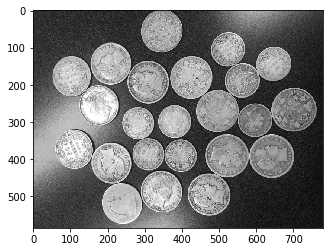

In [2]:
img_gray = cv2.imread('coins.jpg', 0)
img_rgb = cv2.imread('coins.jpg', 1)
plt.imshow(img_gray, 'gray')
plt.show()

## The Watersheds Algorithm
##### Useful for counting the number of particles or grains in an image, the watersheds algorithm works by modelling the image as a set of hills and basins, where where the basins are 'filled' until the boundaries between them remain.
##### For a visualization of the algorithm visit: http://www.cmm.mines-paristech.fr/~beucher/wtshed.html

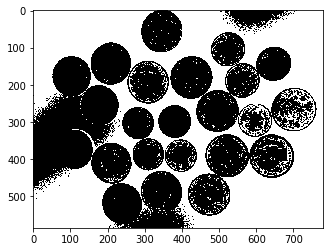

In [3]:
# Here we use Otsu Thresholding to select the darker grains in the image
ret, img_thresh_otsu = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(img_thresh_otsu, 'gray')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

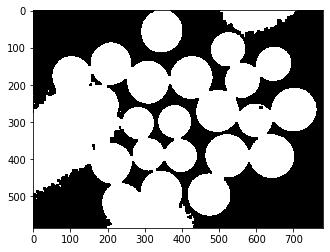

In [7]:
# Clean up the thresholded data to remove the stray pixel clusters
kernel = np.ones((7,7), np.uint8)
img_background = cv2.morphologyEx(img_thresh_otsu, cv2.MORPH_OPEN, kernel)
img_background = ~img_background  # Inverting the Image! i.e. black becomes white and vice versa
plt.imshow(img_background, 'gray')
plt.show

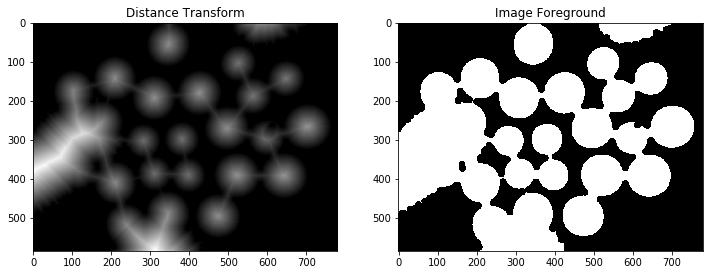

In [8]:
# Define a distance transform the isolate the centers of each individual grains i.e.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

dist_transform = cv2.distanceTransform(img_background,cv2.DIST_L2,3)
ax[0].imshow(dist_transform, 'gray')
ax[0].set_title('Distance Transform')

ret, img_foreground = cv2.threshold(dist_transform, 0.05*dist_transform.max(), 255, 0)
ax[1].imshow(img_foreground, 'gray')
ax[1].set_title('Image Foreground')

plt.show()

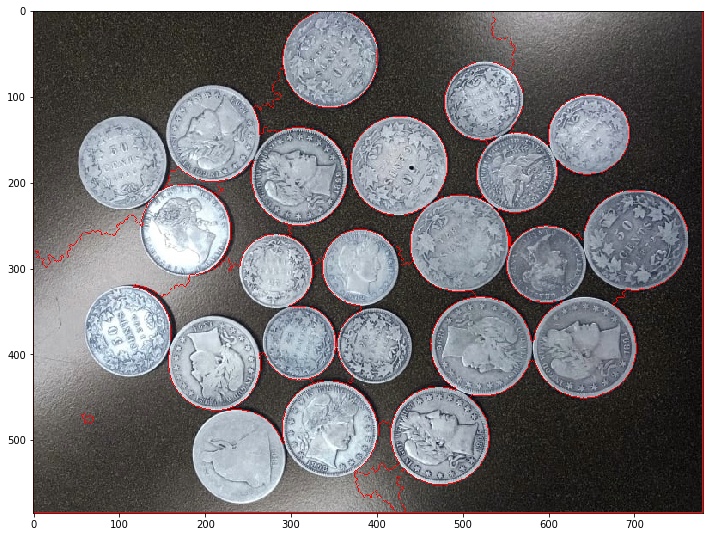

In [10]:
plt.figure(figsize=(12,12))

img_foreground = np.uint8(img_foreground) 
img_background = np.uint8(img_background) 

unknown = img_background - img_foreground
ret, markers = cv2.connectedComponents(img_foreground)
markers[unknown==255] = 0
markers = cv2.watershed(img_rgb, markers)
img_rgb[markers == -1] = [255,0,0]
plt.imshow(img_rgb)
plt.show()